
▎Описание

Этот набор данных был создан с использованием API платформы Binance, одного из крупнейших криптовалютных бирж в мире.

▎Что такое Binance API?

Binance API — это интерфейс программирования приложений, который позволяет разработчикам взаимодействовать с серверами Binance через программный код на таких языках, как Python, Java, JavaScript и других. Используя этот API, трейдеры и разработчики могут автоматизировать процессы торговли, получать доступ к данным о ценах и объемах торгов, а также управлять своими учетными записями.

▎Разновидности API

Binance предлагает несколько типов API, каждый из которых предназначен для определенных задач:

1. RESTful API:
   - Работает на основе HTTP-запросов и позволяет пользователям отправлять запросы для получения или отправки данных. С его помощью можно получить информацию о текущих ценах, исторических данных, а также выполнять торговые операции.

2. WebSocket API:
   - Предоставляет возможность получать потоковые данные в реальном времени. Это особенно полезно для отслеживания изменений цен, объемов торгов и обновлений учетной записи без необходимости постоянно отправлять запросы к серверу.

▎Структура набора данных

Данный набор данных генерируется с интервалом в одну минуту с использованием Binance API. Он включает в себя несколько ключевых столбцов, которые отражают динамику изменения цены Биткоина:

- Цена открытия: стоимость Биткоина в начале минутного интервала.
- Максимальная цена: наивысшая цена Биткоина за минуту.
- Минимальная цена: наименьшая цена Биткоина за минуту.
- Цена закрытия: стоимость Биткоина в конце минутного интервала.
- Объем торгов: количество Биткоинов, проданных за этот интервал времени.

Время открытия и закрытия каждой записи в наборе данных указано в формате метки времени Unix, что позволяет точно отслеживать временные рамки для анализа и визуализации данных.

▎Предметная область

Финансы(?)

▎Реальные данные

Набор данных создан с использованием Binance API, то есть основан на реальных данных о торговле криптовалютой. Эти данные отражают реальные цены, объемы торгов и другие параметры за определенные временные интервалы. Данные были собраны в определённый период (С 1 января 2021 года по 12 мая 2021 года с интервалом в 1 минуту) и не отражают текущую рыночную ситуацию.

▎Описание задачи анализа

В качестве задачи для анализа можем взять прогнозирование цен (построение моделей для прогнозирования цены Биткоина на основе массива данных)  
или
классификацию состояний рынка (классификация состояний рынка (например, "рост", "падение", "стабильность") на основе массива данных)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

https://www.kaggle.com/datasets/aakashverma8900/bitcoin-price-usd

In [3]:
raw_data = pd.read_csv(r"C:\Users\Varia\Documents\3_kurs\machine_learning\bitcoin.csv")

In [4]:
data = raw_data.rename(columns=
                    {'Open Time':'open_time','Open':'open_price','High':'high_price','Low':'low_price','Close':'close_price',
                    'Volume':'volume','Close Time':'close_time','Quote asset volume':'quote_asset_volume',
                    'Number of trades':'number_of_trades','Taker buy base asset volume':'taker_buy_base_asset_volume',
                    'Taker buy quote asset volume':'taker_buy_quote_asset_volume'})

In [5]:
data['open_time'] = pd.to_datetime(data['open_time'], unit='ms')
data['close_time'] = pd.to_datetime(data['close_time'], unit='ms')

In [6]:
data['readable_quote'] = data['quote_asset_volume'].apply(lambda x: f"{x:.2f}")

In [7]:
data[['open_price','high_price','low_price','close_price','volume','close_time','readable_quote',
      'number_of_trades','taker_buy_base_asset_volume','taker_buy_quote_asset_volume']]

,open_price,high_price,low_price,close_price,volume,close_time,readable_quote,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 00:00:59.999,794382.04,1292,16.777195,485390.826825
1,28961.67,29017.50,28961.01,29009.91,58.477501,2021-01-01 00:01:59.999,1695802.90,1651,33.733818,978176.468202
2,29009.54,29016.71,28973.58,28989.30,42.470329,2021-01-01 00:02:59.999,1231358.69,986,13.247444,384076.854453
3,28989.68,28999.85,28972.33,28982.69,30.360677,2021-01-01 00:03:59.999,880016.76,959,9.456028,274083.075142
4,28982.67,28995.93,28971.80,28975.65,24.124339,2021-01-01 00:04:59.999,699226.21,726,6.814644,197519.374888
...,...,...,...,...,...,...,...,...,...,...
188312,57517.42,57526.28,57485.00,57485.07,42.575735,2021-05-12 04:35:59.999,2448258.07,1195,15.319691,880913.090845
188313,57485.07,57496.42,57466.75,57481.49,34.205467,2021-05-12 04:36:59.999,1966194.47,1096,15.971891,918058.816162
188314,57477.18,57509.99,57458.18,57470.00,30.211789,2021-05-12 04:37:59.999,1736514.48,955,13.054229,750364.577319
188315,57470.00,57470.01,57400.00,57450.90,45.354728,2021-05-12 04:38:59.999,2605079.80,1559,12.615628,724559.233035


In [8]:
# Установка 'Date' как индекс
data.set_index('open_time', inplace=True)

In [9]:
# Волатильность — это мера изменчивости или колебаний цены актива за определённый период времени. 
# Она показывает, насколько сильно цена актива может изменяться: высокая волатильность означает
# большие колебания цен, а низкая — более стабильные цены.

In [10]:
# Рассчет волатильности (30-дневное стандартное отклонение цены закрытия)
data['Volatility'] = data['close_price'].rolling(window=30).std()

In [11]:
#рассчитаем волатильность в отдельной таблице за 15, 30, 50, 100 дней
#на всякий случай, вдруг пригодится
data_volatility = pd.DataFrame(columns=['V15', 'V30', 'V50','V100'])

In [12]:
data_volatility['V15'] =  data['close_price'].rolling(window=15).std()
data_volatility['V50'] =  data['close_price'].rolling(window=50).std()
data_volatility['V100'] =  data['close_price'].rolling(window=100).std()
data_volatility['V30'] =  data['close_price'].rolling(window=30).std()

In [13]:
# Скользящая средняя — это статистический метод, который используется для сглаживания временных рядов или данных, 
# чтобы выявить тенденции, циклы или другие паттерны. Она помогает уменьшить шум в данных и делает их более понятными.
# Простая скользящая средняя (SMA):
# - Рассчитывается как среднее значение определенного числа последних наблюдений.
# - Например, если у вас есть данные за 5 дней, то 3-дневная простая скользящая средняя будет равна среднему значению
# значений за последние 3 дня.

In [14]:
# Рассчет скользящей средней (20-дневная скользящая средняя)
data['SMA_20'] = data['close_price'].rolling(window=20).mean()

In [15]:
# Добавление столбца с днем недели
data['DayOfWeek'] = data.index.day_name()

# Группировка по дням недели для анализа трендов
weekly_trends = data.groupby('DayOfWeek')['close_price'].mean()

In [17]:
print("Средняя цена Биткоина по дням недели:")
print(weekly_trends)

Средняя цена Биткоина по дням недели:
DayOfWeek
Friday       48170.130103
Monday       48709.738099
Saturday     49053.312999
Sunday       48674.444858
Thursday     49264.883540
Tuesday      48792.132596
Wednesday    49021.056701
Name: close_price, dtype: float64


In [18]:
# Выявление аномалий (цены выше 3 стандартных отклонений от среднего)
threshold = data['close_price'].mean() + 3 * data['close_price'].std()
anomalies = data[data['close_price'] > threshold]

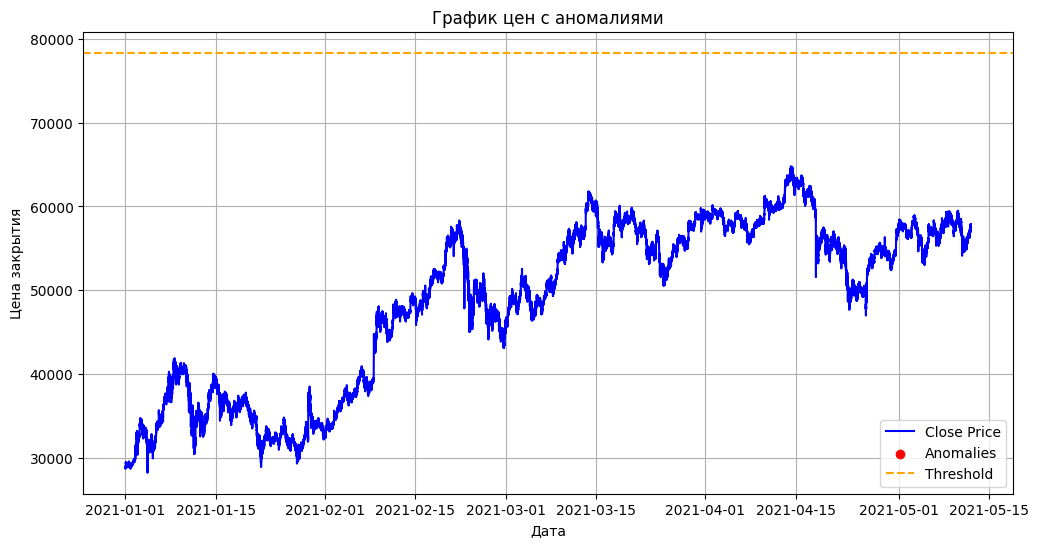

In [19]:
# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close_price'], label='Close Price', color='blue')
plt.scatter(anomalies.index, anomalies['close_price'], color='red', label='Anomalies', marker='o')

# Настройка графика
plt.title('График цен с аномалиями')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.axhline(threshold, color='orange', linestyle='--', label='Threshold')
plt.legend()
plt.grid()
plt.show()

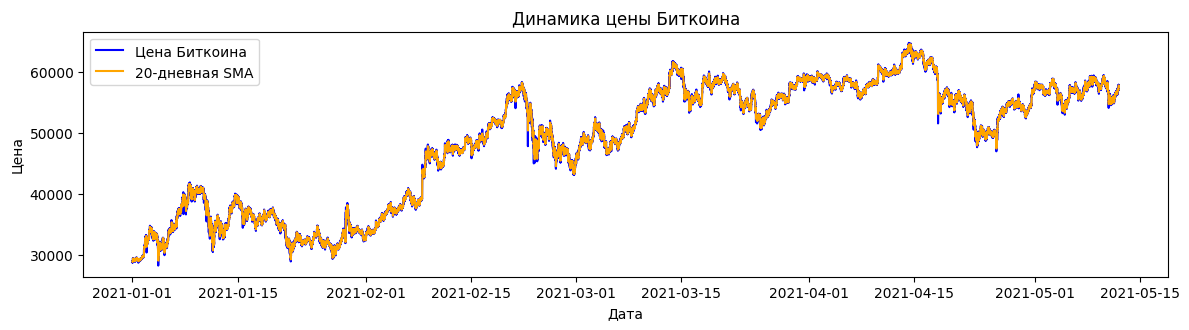

In [20]:
# Визуализация данных
plt.figure(figsize=(14, 7))

# График цены Биткоина
plt.subplot(2, 1, 1)
plt.plot(data.index, data['close_price'], label='Цена Биткоина', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-дневная SMA', color='orange')
plt.title('Динамика цены Биткоина')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()

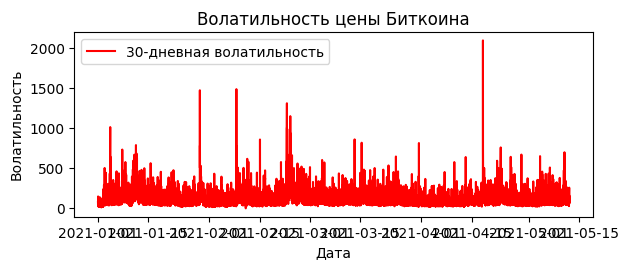

In [21]:
# График волатильности
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Volatility'], label='30-дневная волатильность', color='red')
plt.title('Волатильность цены Биткоина')
plt.xlabel('Дата')
plt.ylabel('Волатильность')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
data.dtypes

open_price                             float64
high_price                             float64
low_price                              float64
close_price                            float64
volume                                 float64
close_time                      datetime64[ns]
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
readable_quote                          object
Volatility                             float64
SMA_20                                 float64
DayOfWeek                               object
dtype: object

open_time: время открытия (временная метка Unix)

open: Цена открытия конкретной минуты

high: самая высокая цена конкретной минуты

low: самая низкая цена конкретной минуты

close: Цена закрытия конкретной минуты

volume: общий объем за определенную минуту.

close_time: время закрытия (временная метка Unix)

quote_asset_volume: объем котируемых активов

number_of_trades: количество сделок за определенную минуту

taker_buy_base_asset_volume: Объем базового актива, купленный Тейкером

taker_buy_quote_asset_volume: Объем активов, купленных Тейкером в цитируемой валюте


In [23]:
data.describe().loc[['mean','std']]

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Volatility,SMA_20
mean,48807.250870,48850.022846,48764.186791,48807.413975,57.316303,2.678839e+06,1533.133578,28.284067,1.321744e+06,117.194412,48807.976165
std,9845.576682,9843.437596,9847.738664,9845.500077,60.822888,2.696383e+06,1090.227989,32.633285,1.452640e+06,86.293082,9844.082103


mean - среднее, std - стандартное отклонение

Для каждого атрибута построим гистограмму распределения значений 

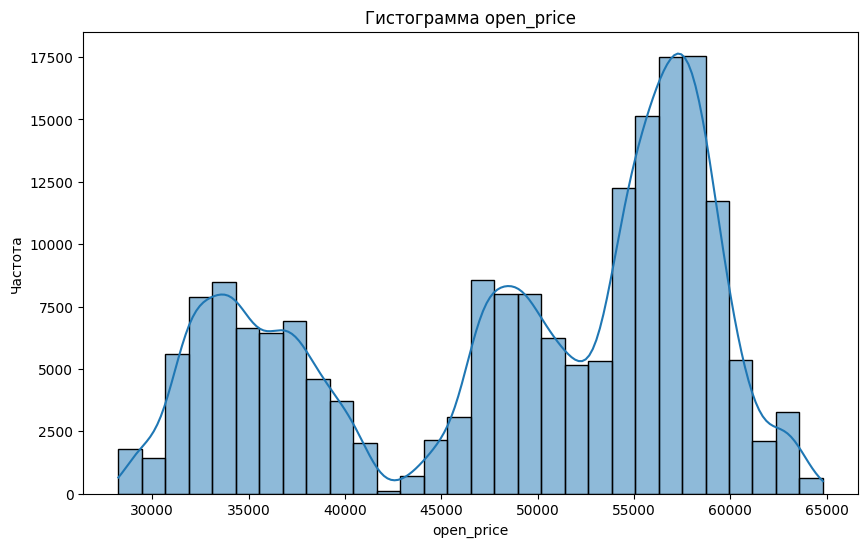

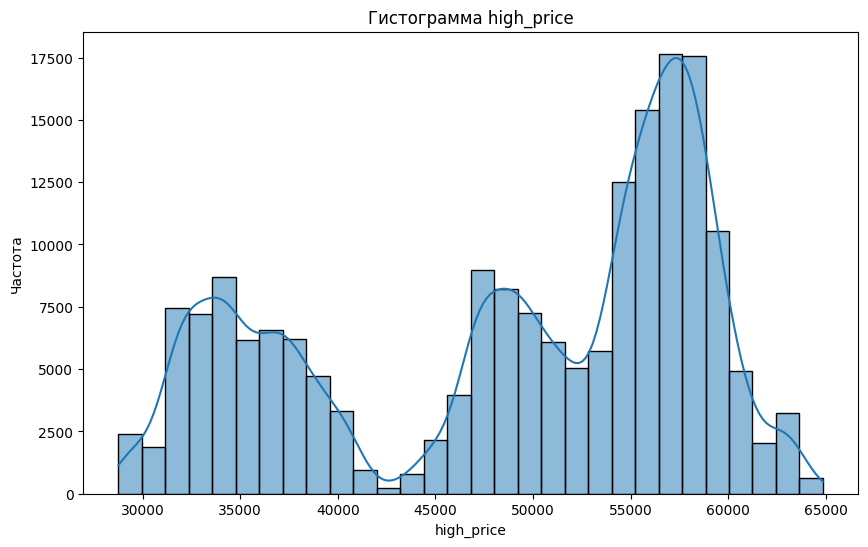

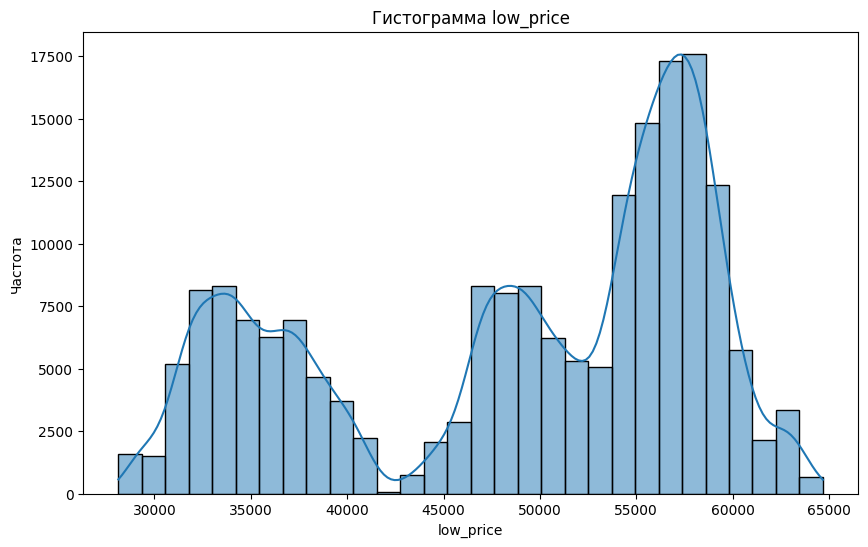

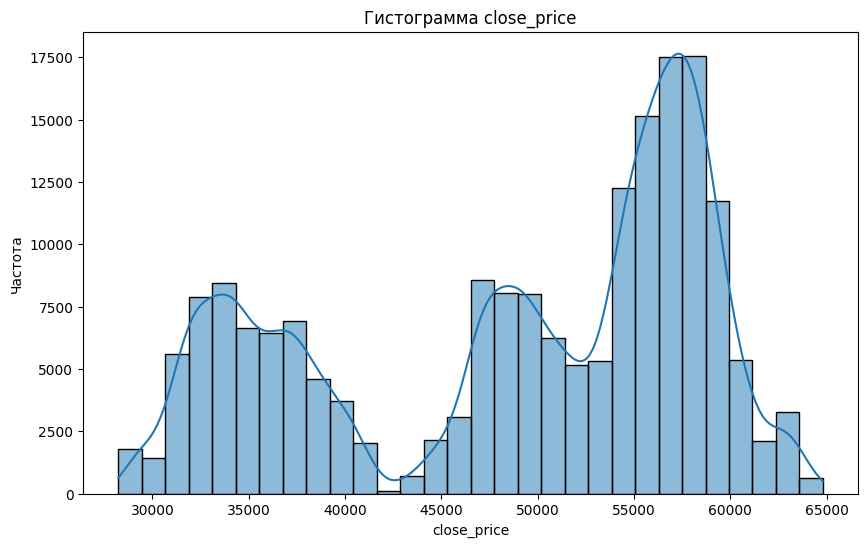

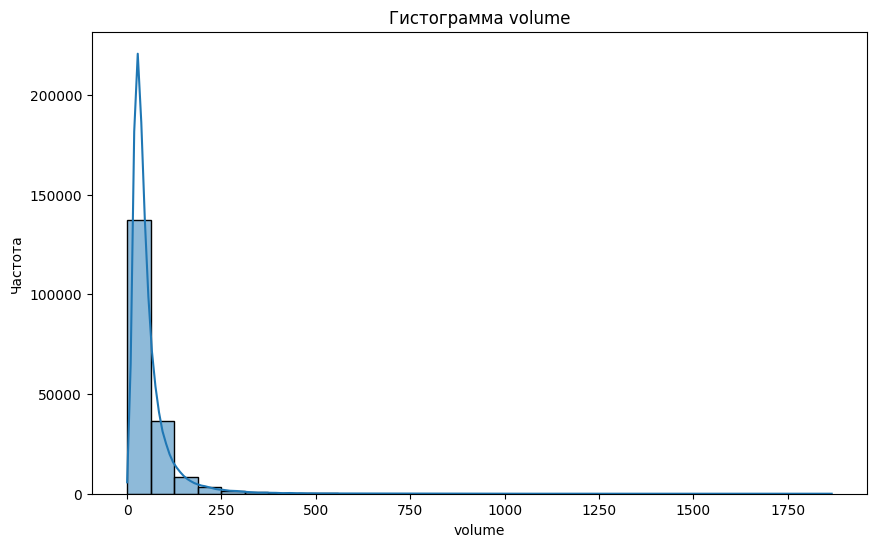

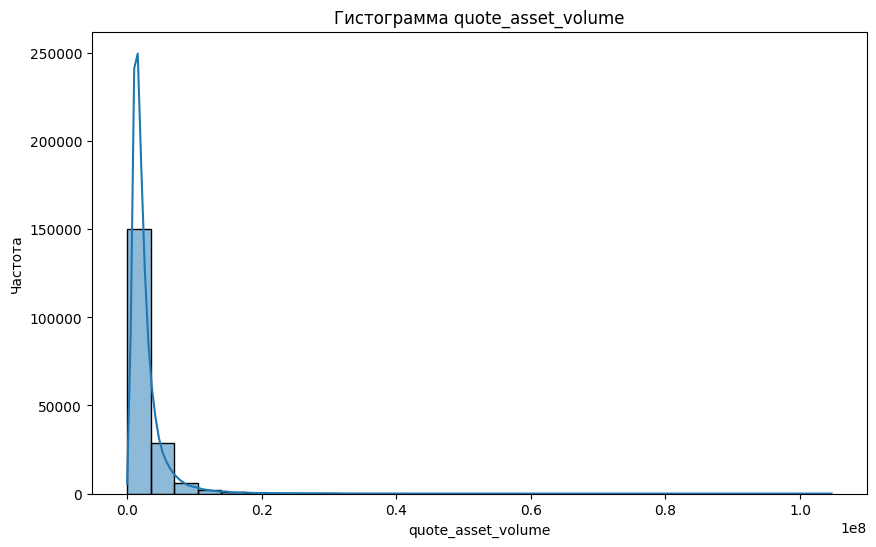

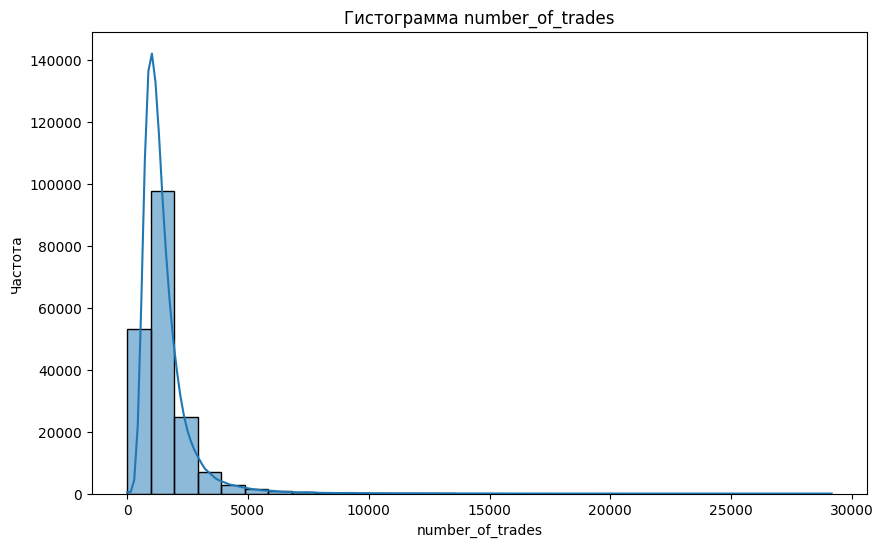

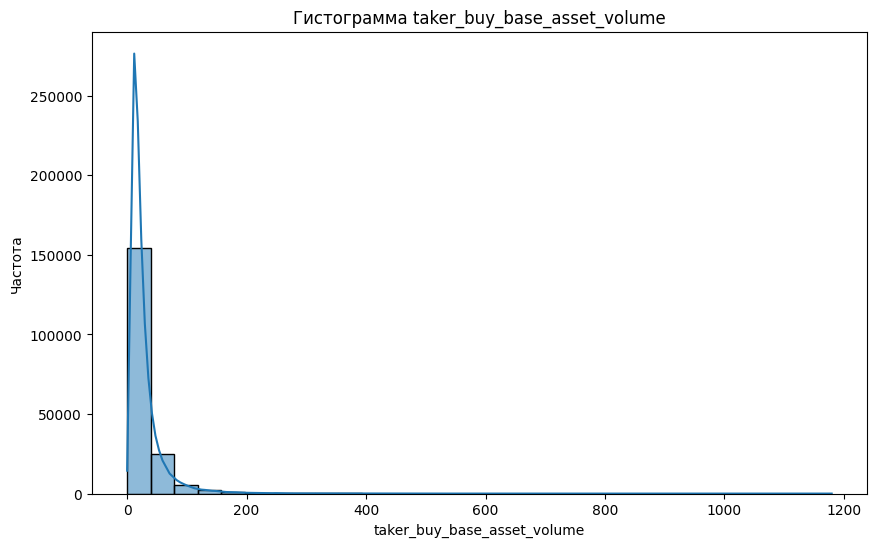

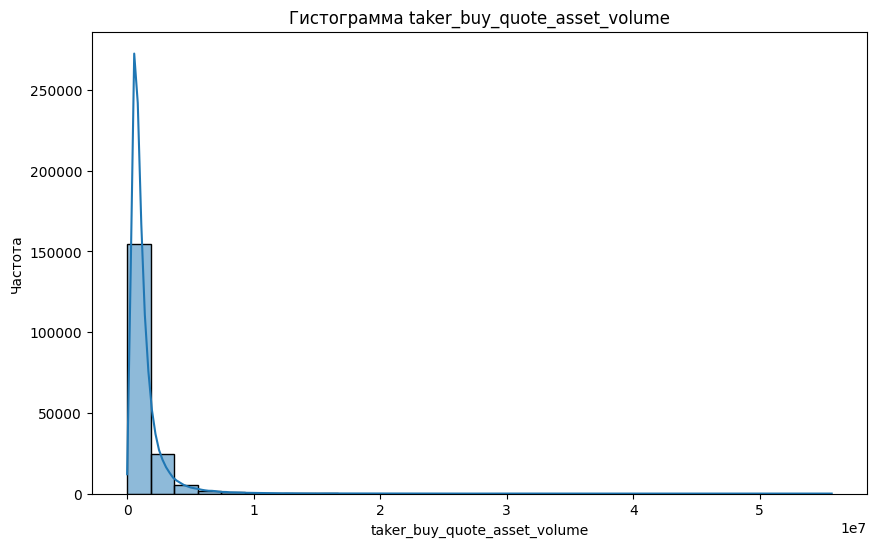

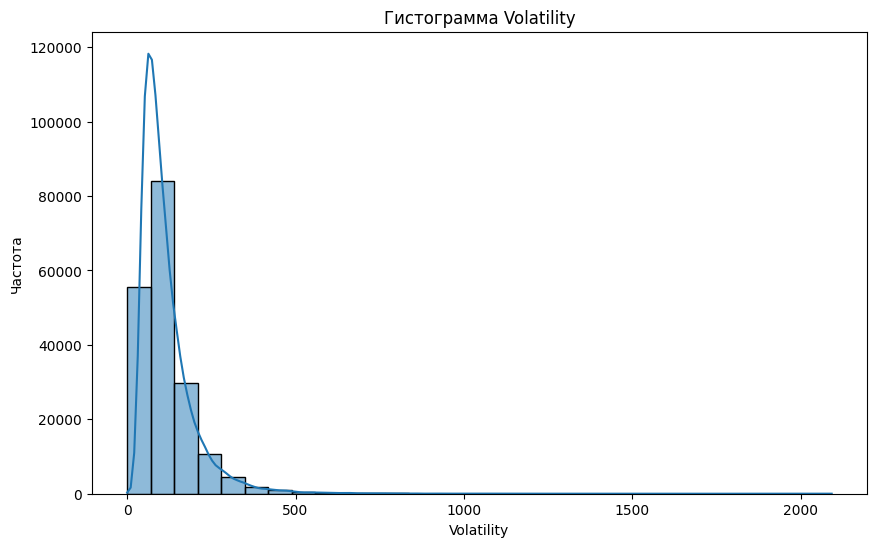

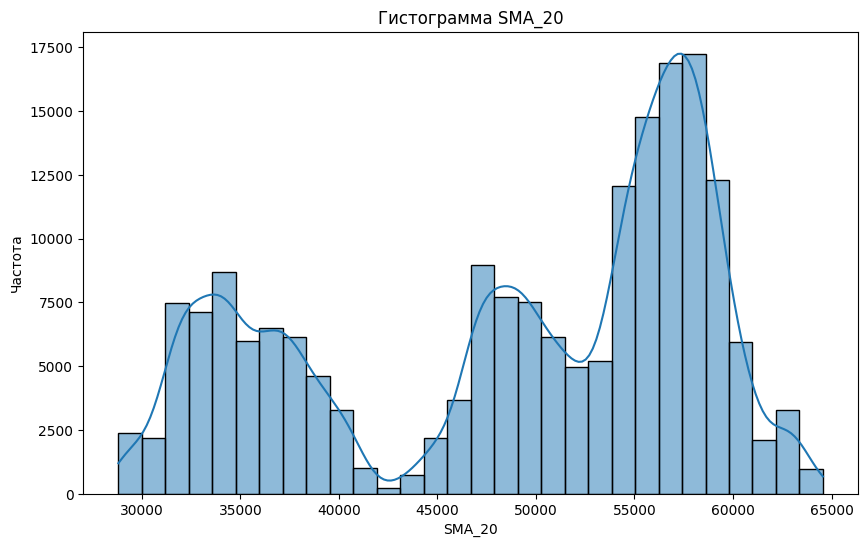

In [24]:
attributes = [
    'open_price', 'high_price', 'low_price', 'close_price', 
    'volume', 'quote_asset_volume', 'number_of_trades', 
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'Volatility', 'SMA_20'
]
for attr in attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[attr], bins=30, kde=True)
    plt.title(f'Гистограмма {attr}')
    plt.xlabel(attr)
    plt.ylabel('Частота')
    plt.show()

 Проверка на пропущенные значения

In [27]:
missing_values = data.isnull().sum()
print("Количество пропущенных значений по атрибутам:")
print(missing_values[missing_values > 0])

Количество пропущенных значений по атрибутам:
Volatility    29
SMA_20        19
dtype: int64
